In [40]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import math
import numpy as np

import geopandas as gpd

In [3]:
! ls

Data Viz Challenge.ipynb vehicle_events.csv       vehicle_paths_pnas.zip
manhattan.geojson        vehicle_events_pnas.csv
requests.csv             vehicle_paths.zip


In [4]:
req = pd.read_csv('requests.csv')
req.head()

,Timestamp,Requested_Pickup,Requested_Dropoff,Actual_Pickup,Actual_Dropoff
0,1380949200,1149,725,218,3601
1,1380949200,1225,1714,2003,3601
2,1380949200,1237,3143,1314,2218
3,1380949200,1323,3566,1330,2573
4,1380949200,1328,2466,1323,2473


In [5]:
events = pd.read_csv('vehicle_events.csv')
events.head()

,Timestamp,Vehicle_ID,Stop_Intersection,Stop_Passengers,Requested_Stop_Intersection
0,1380949200,83,2767,0,2764
1,1380949200,89,3070,0,1818
2,1380949200,112,97,0,972
3,1380949200,121,215,0,396
4,1380949200,141,1314,0,1237


In [7]:
path = pd.read_csv('vehicle_paths.csv')
path.head()

,Timestamp,Vehicle_ID,Latitude,Longitude,Num_Passengers
0,1380949200,83,40.73062,-73.99065,0
1,1380949200,89,40.71429,-74.01153,0
2,1380949200,112,40.77178,-73.97919,0
3,1380949200,121,40.73974,-74.00249,0
4,1380949200,141,40.77114,-73.96392,0


In [9]:
path.shape

(2643431, 5)

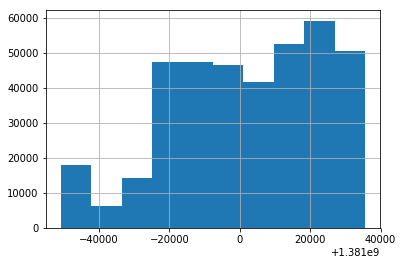

In [10]:
req.Timestamp.hist()

In [32]:
def haversine(lo1, la1, lo2, la2):
    """Calculates distance in miles between two coordinates using Haversine Formula"""
    p = 0.017453292519943295     
    a = 0.5 - math.cos((la2 - la1) * p)/2 + math.cos(la1 * p) * math.cos(la2 * p) * (1 - math.cos((lo2 - lo1) * p)) / 2
    return 2*7917.5 * math.asin(math.sqrt(a))


In [65]:
column_names = ['Timestamp', 'Vehicle_ID', 'Latitude', 'Longitude', 'Num_Passengers', 'Time_Diff', 'Dist_Diff', 'MpH']
over25 = pd.DataFrame(columns=column_names)
speed = pd.DataFrame(columns=column_names)

counter

for car in path.Vehicle_ID.unique():
    counter +=1
    test = path[path['Vehicle_ID'] == car]
    
    for i in range(len(test)):
        if (i == 0):
            continue
        
        time_temp = test.iloc[i,0] - test.iloc[i-1, 0]
        #Check if non-zero time difference between events
        if (time_temp == 0):
            continue
        
        #Check if over 25mph
        dist_temp = haversine(test.iloc[i-1, 3], test.iloc[i-1, 2], test.iloc[i, 3], test.iloc[i, 2])
        mph_temp = dist_temp/time_temp*60*24
        if (mph_temp > 25):
            out_list = []
            for j in range(len(test.iloc[i,:])):
                out_list.append(test.iloc[i,j])
            out_list.append(time_temp)
            out_list.append(dist_temp)
            out_list.append(mph_temp)
            
            over25 = pd.concat([over25, pd.DataFrame([out_list], columns=column_names)], axis=0)
        
        #Capture all mphs
        out_list = []
        for j in range(len(test.iloc[i,:])):
            out_list.append(test.iloc[i,j])
        out_list.append(time_temp)
        out_list.append(dist_temp)
        out_list.append(mph_temp)

        speed = pd.concat([speed, pd.DataFrame([out_list], columns=column_names)], axis=0)
            

    

KeyboardInterrupt: 

In [67]:
len(path.Vehicle_ID.unique())

470

In [70]:
column_names = ['Latitude', 'Longitude','MpH']
over25 = pd.DataFrame(columns=column_names)
speed = pd.DataFrame(columns=column_names)

counter = 0

for car in path.Vehicle_ID.unique():
    counter +=1
    test = path[path['Vehicle_ID'] == car]
    
    for i in range(len(test)):
        if (i == 0):
            continue
        
        time_temp = test.iloc[i,0] - test.iloc[i-1, 0]
        #Check if non-zero time difference between events
        if (time_temp == 0):
            continue
        
        dist_temp = haversine(test.iloc[i-1, 3], test.iloc[i-1, 2], test.iloc[i, 3], test.iloc[i, 2])
        mph_temp = dist_temp/time_temp*60*24
        
        #Capture all mphs
        out_list = []
        out_list.append(test.iloc[i, 2])
        out_list.append(test.iloc[i, 3])
        out_list.append(mph_temp)

        speed = pd.concat([speed, pd.DataFrame([out_list], columns=column_names)], axis=0)
            
    print(str(round(counter/470, 2)*100))
    

0.0
0.0
1.0
1.0
1.0
1.0
1.0
2.0
2.0
2.0
2.0
3.0
3.0
3.0
3.0
3.0
4.0
4.0
4.0
4.0
4.0
5.0
5.0
5.0
5.0
6.0
6.0
6.0
6.0
6.0
7.000000000000001
7.000000000000001
7.000000000000001
7.000000000000001
7.000000000000001
8.0
8.0
8.0
8.0
9.0
9.0
9.0
9.0
9.0
10.0
10.0
10.0
10.0
10.0
11.0
11.0
11.0
11.0
11.0
12.0
12.0
12.0
12.0
13.0
13.0
13.0
13.0
13.0
14.000000000000002
14.000000000000002
14.000000000000002
14.000000000000002
14.000000000000002
15.0
15.0
15.0
15.0
16.0
16.0
16.0
16.0
16.0
17.0
17.0
17.0
17.0
17.0
18.0
18.0
18.0
18.0
19.0
19.0
19.0
19.0
19.0
20.0
20.0
20.0
20.0
20.0
21.0
21.0
21.0
21.0
21.0
22.0
22.0
22.0
22.0
23.0
23.0
23.0
23.0
23.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
25.0
25.0
26.0
26.0
26.0
26.0
26.0
27.0
27.0
27.0
27.0
27.0
28.000000000000004
28.000000000000004
28.000000000000004
28.000000000000004
28.999999999999996
28.999999999999996
28.999999999999996
28.999999999999996
28.999999999999996
30.0
30.0
30.0
30.0
30.0
31.0
31.0
31.0
31.0
31.0
32.0
32.0
32.0
32.0
33.0
33.0
33.0
33.

KeyboardInterrupt: 

In [62]:
over25

,Timestamp,Vehicle_ID,Latitude,Longitude,Num_Passengers,Time_Diff,Dist_Diff,MpH
0,1380954218,83,40.71406,-73.99759,4,1,0.019304,27.797869
0,1380990956,83,40.71427,-73.99414,4,1,0.019949,28.726256
0,1380991555,83,40.70960,-74.00155,4,1,0.019074,27.466938
0,1380999699,83,40.80421,-73.96679,4,1,0.020243,29.149335
0,1381000008,83,40.78575,-73.97848,4,1,0.020247,29.155567
0,1381020412,83,40.72799,-74.00219,4,1,0.017885,25.754866
0,1381025564,83,40.73361,-74.00281,4,1,0.018130,26.107286
0,1381025923,83,40.72410,-73.99272,4,1,0.020341,29.291179
0,1381034292,83,40.73062,-73.99065,4,1,0.017761,25.576406
0,1381035047,83,40.71352,-73.99864,2,1,0.018450,26.568369


In [72]:
speed.head()

,Latitude,Longitude,MpH
0,40.73062,-73.99065,0.000000
0,40.73100,-73.99041,13.971619
0,40.73128,-73.99035,14.111649
0,40.73196,-73.99020,15.243281
0,40.73276,-73.99003,14.658310


In [78]:
speed['LatLong'] = speed['Latitude'].map(str) + ' ' + speed['Longitude'].map(str)
speed.head()

,Latitude,Longitude,MpH,LatLong
0,40.73062,-73.99065,0.000000,40.73062 -73.99065
0,40.73100,-73.99041,13.971619,40.731 -73.99041
0,40.73128,-73.99035,14.111649,40.73128 -73.99035
0,40.73196,-73.99020,15.243281,40.73196 -73.9902
0,40.73276,-73.99003,14.658310,40.73276 -73.99003


In [98]:
speed_group = pd.DataFrame(speed.groupby(['LatLong'])['MpH'].mean())
speed_group = speed_group.reset_index()
speed_group.columns = ['LatLong','Mean_MpH']
speed_group['Latitude'] = speed_group['LatLong'].apply(lambda x: x.split(' ')[0])
speed_group['Longitude'] = speed_group['LatLong'].apply(lambda x: x.split(' ')[1])
speed_group.drop(['LatLong'], axis=1, inplace=True)
speed_group.head()


,Mean_MpH,Latitude,Longitude
0,14.444859,40.701609999999995,-74.01201
1,14.481544,40.70179,-74.01116
2,14.027670,40.701879999999996,-74.0108
3,10.555211,40.70193,-74.00986
4,15.260440,40.702009999999994,-74.00959


In [99]:
over25.to_csv('over25mph.csv')
speed_group.to_csv('speed.csv')